In [210]:

import pandas as pd
import matplotlib.pyplot as plt
import re


In [30]:
path = '/home/ofir/ofir_code/crystoper/data/pdb_data/parsed_data.csv'

In [197]:
df_pe = pd.read_csv(path)
df_pe.head()

,pdb_id,pe_index,sequence,poly_type,struct_method,crystal_method,ph,temp,pdbx_details,deposit_date,revision_date
0,5IQ6,1,MDVIGERIKRIKEEHNSTWHYDDENPYKTWAYHGSYEVKATGSASS...,Protein,X-RAY DIFFRACTION,"VAPOR DIFFUSION, SITTING DROP",7.5,293.00,"HEPES pH7.5, PAA (poly acrilic acid) 20%, MgCl...",2016-03-10T00:00:00+0000,2024-05-08T00:00:00+0000
1,5IQB,1,MEYRYDDNATNVKAMKYLIEHYFDNFKVDSIEIIGSGYDSVAYLVN...,Protein,X-RAY DIFFRACTION,"VAPOR DIFFUSION, HANGING DROP",7.5,296.00,"80-120mM MgCl2, 8% glycerol, 10% PEG 3350, 100...",2016-03-10T00:00:00+0000,2023-09-27T00:00:00+0000
2,6IQ4,6,ATCAATATCCACCTGCAGATACTACCAAAAGTGTATTTGGAAACTG...,DNA,X-RAY DIFFRACTION,"VAPOR DIFFUSION, HANGING DROP",6.0,291.15,"manganese chloride, potassium chloride, potass...",2018-11-06T00:00:00+0000,2024-03-27T00:00:00+0000
3,4IQJ,4,MGSKLKFAHLHQHTQFSLLDGAAKLQDLLKWVKETTPEDPALAMTD...,Protein,X-RAY DIFFRACTION,"VAPOR DIFFUSION, SITTING DROP",8.8,298.00,"0.1 M TRIS pH 8.8, 18% (w/v) polyethylene glyc...",2013-01-11T00:00:00+0000,2023-09-20T00:00:00+0000
4,4IQW,1,HMSPSPVPGSQNVPAPAVKKISQYACQRRTTLNNYNQLFTDALDIL...,Protein,X-RAY DIFFRACTION,"VAPOR DIFFUSION, HANGING DROP",6.0,293.00,"20% PEG4000, 200 mM sodium formate, 100 mM MES...",2013-01-13T00:00:00+0000,2023-09-20T00:00:00+0000


# features in the data in the data
* pdb_id - id of the entry 
* pe_index - id of the polymer entity (a sub-unit in an entry)
* sequence - the sequence of a polymer entity
* poly_type - type of polymeric entity
* struct_method - method used to detrmine the crystal structure 
* crystal_method - method used to create the structure
* ph - pH in the buffer durring crystallization
* temp - temperature (in K) in the buffer durring crystallization
* pdbx_details - free text describing the crystallization process and the buffer reagents.
* deposit_date - date of structure deposit in the PDB.
* revision_date - date of last revision of the entry in the PDB.



# PDB structure, "entry" and "polymer entity"
A single PDB structure (AKA entry) can have multiple separate polymeric subunits (AKA polymer entities).

Poly entities of the same PDB entry will have exactly same info in all features except 'pe_index', 'sequence' and 'poly_type' 

this is because all entities of a single entry were crystalize together in the same assay.

In [198]:
#we will get a df of entries alone 
cols = list(df.columns)
cols = [col for col in cols if col not in ('pe_index', 'sequence', 'poly_type')]
df_entries = df_pe[cols].drop_duplicates()
df_entries

,pdb_id,struct_method,crystal_method,ph,temp,pdbx_details,deposit_date,revision_date
0,5IQ6,X-RAY DIFFRACTION,"VAPOR DIFFUSION, SITTING DROP",7.5,293.00,"HEPES pH7.5, PAA (poly acrilic acid) 20%, MgCl...",2016-03-10T00:00:00+0000,2024-05-08T00:00:00+0000
1,5IQB,X-RAY DIFFRACTION,"VAPOR DIFFUSION, HANGING DROP",7.5,296.00,"80-120mM MgCl2, 8% glycerol, 10% PEG 3350, 100...",2016-03-10T00:00:00+0000,2023-09-27T00:00:00+0000
2,6IQ4,X-RAY DIFFRACTION,"VAPOR DIFFUSION, HANGING DROP",6.0,291.15,"manganese chloride, potassium chloride, potass...",2018-11-06T00:00:00+0000,2024-03-27T00:00:00+0000
3,4IQJ,X-RAY DIFFRACTION,"VAPOR DIFFUSION, SITTING DROP",8.8,298.00,"0.1 M TRIS pH 8.8, 18% (w/v) polyethylene glyc...",2013-01-11T00:00:00+0000,2023-09-20T00:00:00+0000
4,4IQW,X-RAY DIFFRACTION,"VAPOR DIFFUSION, HANGING DROP",6.0,293.00,"20% PEG4000, 200 mM sodium formate, 100 mM MES...",2013-01-13T00:00:00+0000,2023-09-20T00:00:00+0000
...,...,...,...,...,...,...,...,...
291874,3L9V,X-RAY DIFFRACTION,"VAPOR DIFFUSION, HANGING DROP",7.0,293.00,"1.45M sodium malonate, 0.5% (w/v) Jeffamine ED...",2010-01-05T00:00:00+0000,2017-11-01T00:00:00+0000
291875,7L9Q,X-RAY DIFFRACTION,"VAPOR DIFFUSION, HANGING DROP",8.6,298.00,"23% PEG3350, 100 mM Tris-HCl, pH 8.6, 200 mM m...",2021-01-04T00:00:00+0000,2023-10-18T00:00:00+0000
291876,4L9D,X-RAY DIFFRACTION,"VAPOR DIFFUSION, HANGING DROP",5.5,291.00,"1.2 M sodium citrate and 20% (w/v) PEG 8K, pH ...",2013-06-18T00:00:00+0000,2024-02-28T00:00:00+0000
291877,1L96,X-RAY DIFFRACTION,NaN,NaN,NaN,NaN,1992-02-11T00:00:00+0000,2024-02-14T00:00:00+0000


In [199]:
print(f"In total the data contains {df_entries.shape[0]} PDB structures (entries) that are made of {df_pe.shape[0]} polymer entities")

In total the data contains 188770 PDB structures (entries) that are made of 291880 polymer entities


In [40]:
# The data was filter for X-DAY only when fetching. yet - we want to validate it
print(df_entries.groupby('struct_method').size())

struct_method
ELECTRON CRYSTALLOGRAPHY         3
ELECTRON MICROSCOPY            345
FIBER DIFFRACTION               30
NEUTRON DIFFRACTION             40
POWDER DIFFRACTION              21
SOLID-STATE NMR                 13
SOLUTION NMR                   205
SOLUTION SCATTERING             21
X-RAY DIFFRACTION           188092
dtype: int64


In [200]:
#let filter out all the nonX-ray data
df_pe = df_pe.query('struct_method == "X-RAY DIFFRACTION"')
df_entries = df_entries.query('struct_method == "X-RAY DIFFRACTION"')


In [201]:
#while most crystallization data is for Proteins, some structures contain also DNA and RNA. For the sake of this model we prefer to leave does out.
#lets see their fraction in the data
df_pe.groupby('poly_type').size()

poly_type
DNA           15101
NA-hybrid       218
Other             6
Protein      268067
RNA            6529
dtype: int64

In [202]:
mixed_ids = set(df_pe.query('poly_type != "Protein"').pdb_id)
proteins_only_ids = set([id for id in df_pe.pdb_id if id not in mixed_ids])
print(f'out of {len(df_entries)} structures, {len(proteins_only_ids)} contains proteins only')



out of 188092 structures, 176361 contains proteins only


In [203]:
#for the sake of our analysis will use proteins-only structures
df_pe = df_pe[df_pe.pdb_id.isin(proteins_only_ids)]
df_entries = df_entries[df_entries.pdb_id.isin(proteins_only_ids)]

0
1     142352
2      23783
3       6875
4       1791
5        675
6        146
7         60
8         35
9         10
10        40
11        33
12        24
13        85
14       263
15        65
16        16
17         3
18         6
19        13
20        83
22         1
48         2
dtype: int64

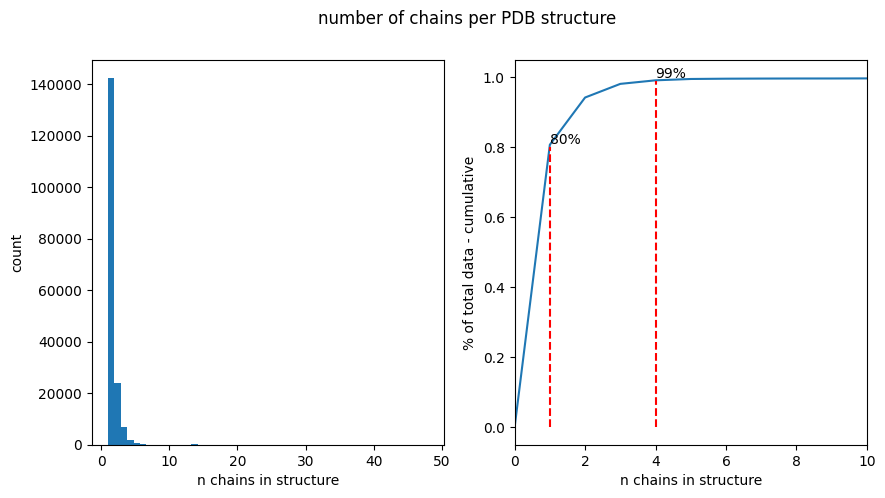

In [204]:
#lets explore how many separate chains per structure - meaning how many polymer entities per pdb_id
n_chains = df_pe.groupby('pdb_id').size()

fig, axes = plt.subplots(1,2, figsize=[10,5])

ax = axes[0]
ax.hist(n_chains, bins=50);
ax.set_xlabel('n chains in structure')
ax.set_ylabel('count')

#calculate cumsum the histogram data for counting number of pdb_id with x chains
cumsum = n_chains.to_frame().reset_index().groupby(0).size().cumsum()
cumsum = pd.concat([pd.Series((0)), cumsum]) #add dummy zero
cumsum /= cumsum.iloc[-1]

ax = axes[1]
 
ax.plot(cumsum)
ax.set_xlabel('n chains in structure')
ax.set_ylabel('% of total data - cumulative')

# ax.hlines([0.8, 0.99], 0, 50, color='red', linestyles='--')
ax.vlines([1, 4], [0, 0], [0.8, 0.99], color='red', linestyles='--')
ax.text(1, 0.81, '80%')
ax.text(4 ,1, '99%')
ax.set_xlim([0,10])

fig.suptitle('number of chains per PDB structure')

n_chains.to_frame().reset_index().groupby(0).size()

As seen in the above figure, 80% have single chain, and 99% has 5 chains or less.

We will start by training a model for structures with a single chain only.

Later on a model that take more than one chain can be trained.

In [205]:
#filter for single chains
s = df_pe.groupby('pdb_id').size()
singles_ids = set(s[s == 1].index)
df_pe = df_pe[df_pe.pdb_id.isin(singles_ids)]
df_entries = df_entries[df_entries.pdb_id.isin(singles_ids)]




As a POC, we want to train a model that predicts pH and Temp alone

Lets see how these features look like



There are 34564 our of 142352 entries


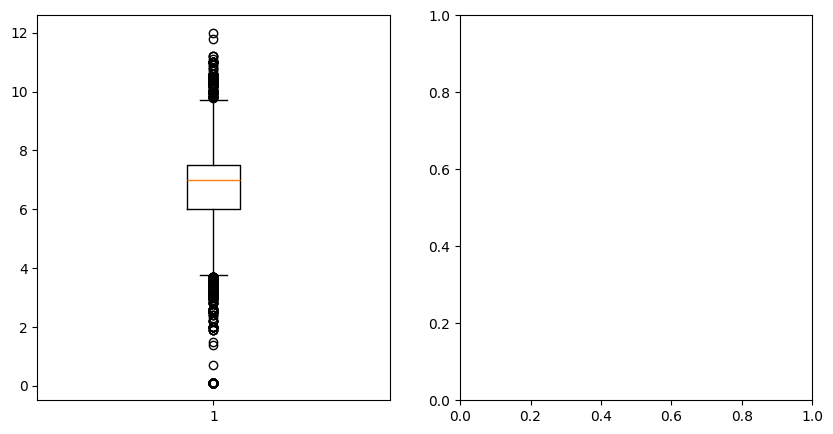

In [206]:
fig,axes = plt.subplots(1, 2, figsize=[10,5])

y = df_entries[df_entries.ph.notna()].ph

ax = axes[0]
ax.boxplot(y);

print(f'There are {len(df_entries[df_entries.ph.isna()])} our of {len(df_entries)} entries')

# PH
some pH values are extreme (0.1, 12) but manual validation of few ids (5S44, 5S47, 5S4B,4BIN ) shows these are genuine.



In [211]:
#lets fill the missing ph values by extracting the from the verbal description


def extract1(s):
    pass

df = df_entries[df_entries.ph.isna()]


    


for i, x in enumerate(df.pdbx_details):
    print(x)
    if i > 50: break



100 mM imidazole, 35% MPD, 200 mM magnesium chloride
0.2 M sodium acetate, 0.1 M Bis-Tris propane (pH 6.5) and 20% (w/v) PEG 3350
0.1 M SPG buffer pH 8.0 and 25% PEG 1500
100 mM imidazole, 15%(v/v) reagent alcohol, 200 mM magnesium chloride
100mM sodium citrate, 30% PEG 400, VAPOR DIFFUSION, HANGING DROP, temperature 293K
20% PEG 3350, 0.1 M Bis-tris pH 5.5, 0.1 M sodium acetate pH 4.5
20% PEG 3350, 0.1 M Bis-tris pH 5.5, 0.1 M sodium acetate pH 4.5
0.1M sodium acetate (pH 5.0), 1.42M ammonium sulfate
pH7.4, PEG 8000, ethylene glycol, HEPES, CHPAS
PEG3350, sodium thyocinate
VAPOR DIFFUSION, HANGING DROP, temperature 297K
100 mM Tris, pH9.0, 1.0 M NaCl
14-26 % PEG 750MME, SODIUM ACETATE, pH 4.6-5.2, VAPOR DIFFUSION, HANGING DROP, temperature 293K
20% PEG 3350, 0.1 M Bis-tris pH 5.5, 0.1 M sodium acetate pH 4.5
25% PEG 4000, 150 mM amimonium sulfate and 100 mM MES, pH 5.5
0.1 M Sodium Acetate, 0.1 M HEPES-NaOH pH 7.5, 22 % (w/v) PEG 4000, 4.4 % (v/v) Formamide
0.1 M Bis-Tris propane pH 8

In [217]:
s = '0.2 M AMMONIUM SULFATE, 0.1 M SODIUM CACODYLATE PH 6.5 AND 30 % PEG 8000 AND GAMMA-BUTYROLACTONE'.lower()
re.findall(r'ph\s*\d(.\d)*', s)

['.5']